### 결정트리(Decision trees)
분류와 회귀 작업 그리고 다중 출력 작업도 가능한 다재다능 한 머신러닝 알고리즘, 또한 매우 복잡한 데이터셋도 학습할 수 있는 알고리즘이다.

### 결정트리 학습과 시작화

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import os

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[: ,2:]# 꽃잎의 길이와 너비 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth =2)
tree_clf.fit(X , y)

DecisionTreeClassifier(max_depth=2)

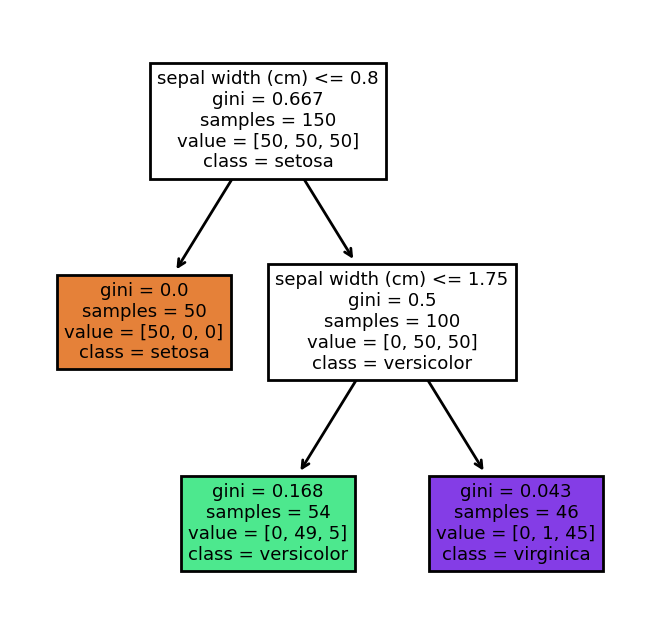

In [3]:
from sklearn import tree
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(tree_clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True);

### 예측하기
트리가 어떻게 예측을 만들어 내는지 살펴보겠습니다. 새로 발견한 붓꽃의 품종을 분류하려 한다고 가정  
루트노드(깊이가 0인 맨 꼭대기의 노드)에서 시작한다. 이 노드는 꽃잎의 길이가 0.8cm보다 짦은지 검사한다. 
만약 그렇다면 루트 노드에서 왼쪽의 자식노드(깊이 1, 왼쪽노드)로 이동한다. 이 경우 노드가 리프노드(자식 노드를 가지지 않는노드)이므로 추가적인 검사를 하지 않는다. 그냥 노드에 있는 예측 클래스를 보고 결정트리가 새로 발견한 꽃의 품종을 iris-setosa라고 예측

또 다른 꽃을 발견했는데 이번에는 꽃잎의 길이가 0.8cm보다 길다. 루트노드의 오른쪽 자식노드로 이동해야한다.이 노드는 리프노드가 아니라서 추가로 '꽃잎의 너비가 1.75cm 보다 작은지' 검사한다. 만약 그렇다면 이 꽃은 아마도 iris-versicolor일 것이다. 그렇지 않다면 iris-virginica일 것이다. 

**결정트리의 여러 장점 중 하나는 데이터 전처리가 거의 필요하지 않다는 것이다. 사실 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다.**

**지니 불순도**

$
G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2}
$


**엔트로피 불순도**

$
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$


**분류에 대한 CART 비용 함수**

$
\begin{split}
&J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
&\text{여기에서 }\begin{cases}
G_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 불순도}\\
m_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 샘플 수}
\end{cases}
\end{split}
$

#### 파라미터 
노드 sample 속성은 얼마나 많은 훈련 샘플이 적용되었는지 헤아린것.   
노드 value 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려준다.    
gini 속성은 불순도를 측정한다.  한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini = 0)하다고 한다.

**<결정 트리의 결정 경계> 생성 코드**

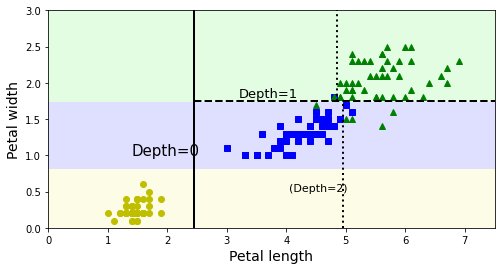

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### 클래스 확률 추정

결정트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수도 있다. 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환

In [5]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

### CART 훈련 알고리즘 
 CART알고리즘은 **탐욕적 알고리즘**이다. 맨 위 루트 노드에서 최적의 분할을 찾으며 이어지는 각 단계에서 이 과정을 반복한다. 현재 단계의 분할이 몇 단계를 거려 가장 낮은 불순도로 이어질 수 있을지 없을지는 고려하지 않는다. 탐욕적 알고리즘은 종종 납득할 만한 솔루션을 만들어 낸다. 하지만 최적의 솔루션은 보장하지 않는다. 

### 계산 복잡도
 예측을 하려면 결정트리를 루트 노드에서부터 리프노드까지 탐색해야 한다. 일반적으로 결정 트리는 거의 균형을 이루고 있으므로 결정 트리를 탐색하기 위해서는 약 $O(log2(m))$개의 노드를 거쳐야 한다. 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관하게 $O(log2(m))$이다. 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠르다.

훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 모든(max_features가 지정되었다면 그보다는 적은)특성을 비교한다. 각 노드에서 모든 샘플의 모든 특성을 비교하면 훈련 복잡도는 $O(n x m log2(m))$이 된다. 훈련세트가 작을 경우(수천개 이하) 사이킷런은 (presort = True) 미리 데이터를 정렬하여 훈련 속도를 높일 수 있다. 하지만 훈련 세트가 클 경우에는 속도가 많이 느려진다. 

### 지니 불순도 또는 엔트로피

기본적으로 지니 불순도가 사용되지만 criterion 매개변수를 entropy로 지정하여 엔트로피 불순도를 사용할 수 있다. 
**엔트로피는 분자의 무질서함을 측정하는 것으로 원래 열역학의 개념이다. 머신러닝에서는 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0이 된다.**


#### 지니 불순도와 엔트로피 중 어떤것을 사용해야 할까? 라는 질문의 답을 설명하자면 실제로 결과값의 큰차이는 없다. 즉, 둘 다 비슷한 트리를 만들어 낸다.   
지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋다. 그러나 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형잡힌 트리를 만든다.

### 규제 매개변수

결정트리는 훈련 데이터에 대한 제약 사항이 거의 없다. 제한을 두지 않으면 트리가 훈련데이터에 아주 가깝게 맞추려는 경향이 있어 대부분 과대적합되기 쉽다. 결정트리는 모델 파라미터가 전혀 없는 것이 아니라 훈련되기 전에 파라미터수가 결정되지 않기 때문에 이런 모델을 비파라미터 모델이라고 부른다.  

반대로 파라미터 모델은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합될 위험이 줄어든다. 

훈련데이터에 대한 과대적합을 피하기 위해 학습할 때 결정트리의 자유도를 제한할 필요가 있다. 규제 매개변수는 사용하는 알고리즘에 따라 다르지만 보통 적어도 결정트리의 최대 깊이는 제어할 수 있다.  

* max_detpth을 줄이면 모델을 규제하게 되고 과대적합 위험이 감소한다. 
* min_samples_leaf 리프노드가 가져야할 최소 샘플 수
* min_weight_fraction_leaf 가중치가 부여된 전체 샘플 수에서의 비율 
* max_leaf_nodes 리프노드의 최대 수 
* max_features 각 노드에서 분할에 사용할 특성의 최대 수 

#### min_으로 시작하는 매개변수를 증가시키거나 max_로 시작하는 매개변수를 감소시키면 모델에 규제가 커짐


In [7]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

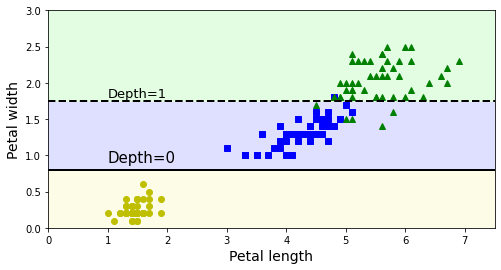

In [8]:
# 훈련세트에 민감한 모델

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

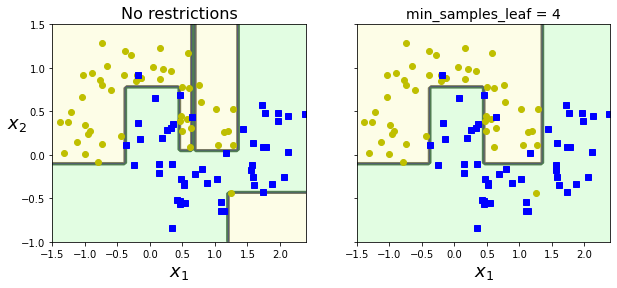

In [9]:
# min_samples_leaf 매개변수를 사용한 규제 

from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

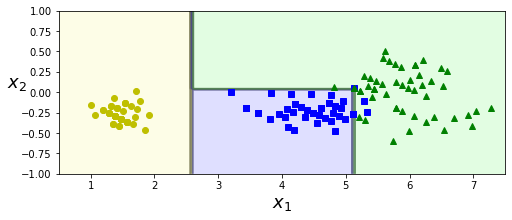

In [10]:
# 데이터셋을 회전하면 완전히 다른 결정 경계를 만든다. 

angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

#### 가지치기 
순도를 높이는 것이 통계적으로 큰 효과가 없다면 리프 노드 바로 위의 노드는 불필요할 수 있다. 대표적으로 카이제곱 검정을 사용하여 우연히 향상된 것인지를 추정한다. 이 확률을 p-값이라 부르며 어떤 임곗값(통상적으로 5%)보다 높으면 그 노드는 불필요한 것으로 간주되고 그 자식 노드는 삭제된다. 가지치기는 불필요한 노드가 모두 없어질 때까지 계속된다. 

### 회귀 , DecisionTreeRegressor

In [12]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth= 2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

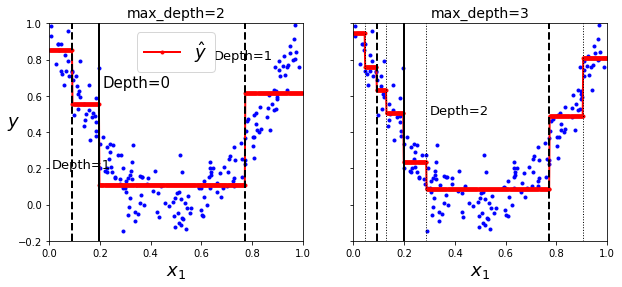

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show()

#### 각 영역의 예측값은 항상 그 영역에 잇는 타깃값의 평균이 된다. 알고지름은 예측값과 가능한 한 많은 샘플이 가까이 있도록 영역을 분할한다. 

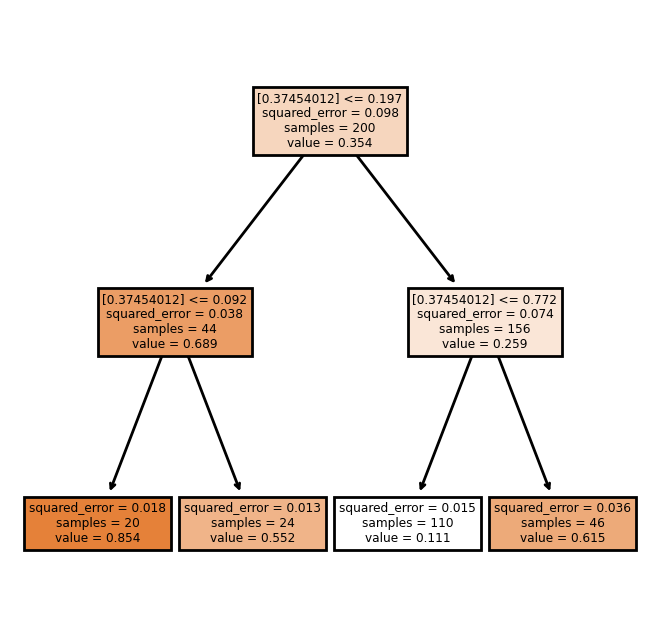

In [20]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(tree_reg1,
               feature_names = X, 
               class_names=y,
               filled = True);

#### 분류트리와 중요한 차이점은 각 노드에서 클래스를 예측하는 대신 어떤 값을 에측한다는 점이다. 

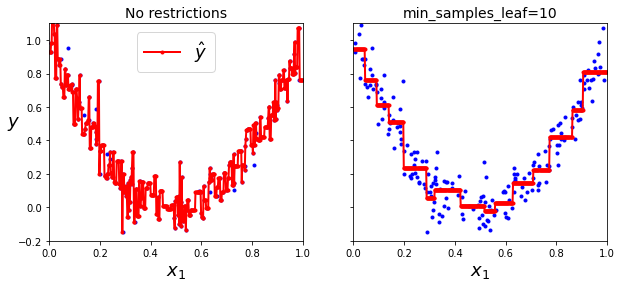

In [21]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

### 불안정성

결정트리는 계단 모양의 결정 경계를 만든다. 그렇기 때문에 훈련 세트의 회전에 민감하다. 이런 문제를 해결하는 한 가지 방법은 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법을 사용하는 것이다. 

결정트리의 주된 문제는 훈련 데이터에 있는 작은 변화에도 매우 민감하다는 것, 문제점은 랜덤포레스트를 통해 만든 많은 트리의 예측을 평균하여 제거할 수 있다.